# Charge Trapping and Ramp effect in HST/WFC3

Following is a demonstration of RECTE, a physically-motivated model for the charge trapping/ramp effect. 

Ramp effect is the most prominent systematics for WFC3/IR detector (as well as other HgCdTe based detectors) in the time-series observation mode. It appears as an exponential ($\sim1-\exp(-t)$) shaped light curve. The typcial amplitude for the ramp is on the order of 1% in the first orbit and reduces to less than 0.5% for the subsequent orbit. Ramp effect systematics removal is critical for accurately measuring transit depths and spectra for transitting exoplanets

In Zhou et al. (2017), we consider the charge trapping processes in the WFC3/IR detector and created RECTE. The essense of RECTE is that a fraction of stmulated charges (by incoming radiation) are trapped by in the detector rather than being detected due to detector defects.

Following demonstration consists of two parts. The first part is to demonstrate how parameters that descriebe the intrument defects affect the shape of the ramp. The second part is to demonstrate how parameters that related to each observation can affect the ramp profile.

In [10]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from rampLightCurve import rampModel, rampCorrection

%matplotlib notebook

## Charge Trapping Processes
RECTE model assumes two populations of charge traps. The two populations are distinguished by their typical trapping timescales ($\tau$). The *slow* traps release the trapped charges at a much longer timescales than the *fast* traps ($\tau_\mathrm{s} >> \tau_\mathrm{f}$). For each trap population, the charge trapping processes are controlled by three parameters (the parameter names used in the python script are in the parenthesis):
* The numbers of traps (`nTrap_s, nTrap_f`)
* Trapping efficiencies (`eta_s, eta_f`)
* Trap lifetimes/timescales (`tau_s, tau_f`)

These parameters determines different aspects of the ramp effect profiles. Roughly speaking, given a specific fluence intensity, the numbers of traps determine how fast the ramp rises (fewer traps, faster rising); trapping efficiencies determine the amplitude of the ramp; trap lifetimes determine the difference of the observed fluxe between the end of one orbit and the beginning of the next. Fast traps have stronger effect at the beginning of each orbits. Slow traps have stronger overall effect, especially at the latter part of each orbit.

Following script creates an interactive plot that demonstrate how each model parameter affects the ramp profile. You can adjust these parameters using the widgets under the plot. The output ramp profile will change accordingly. You can also change the `crate` or `exptime` parameter to adjust the fluence rate and exposure time.

<IPython.core.display.Javascript object>


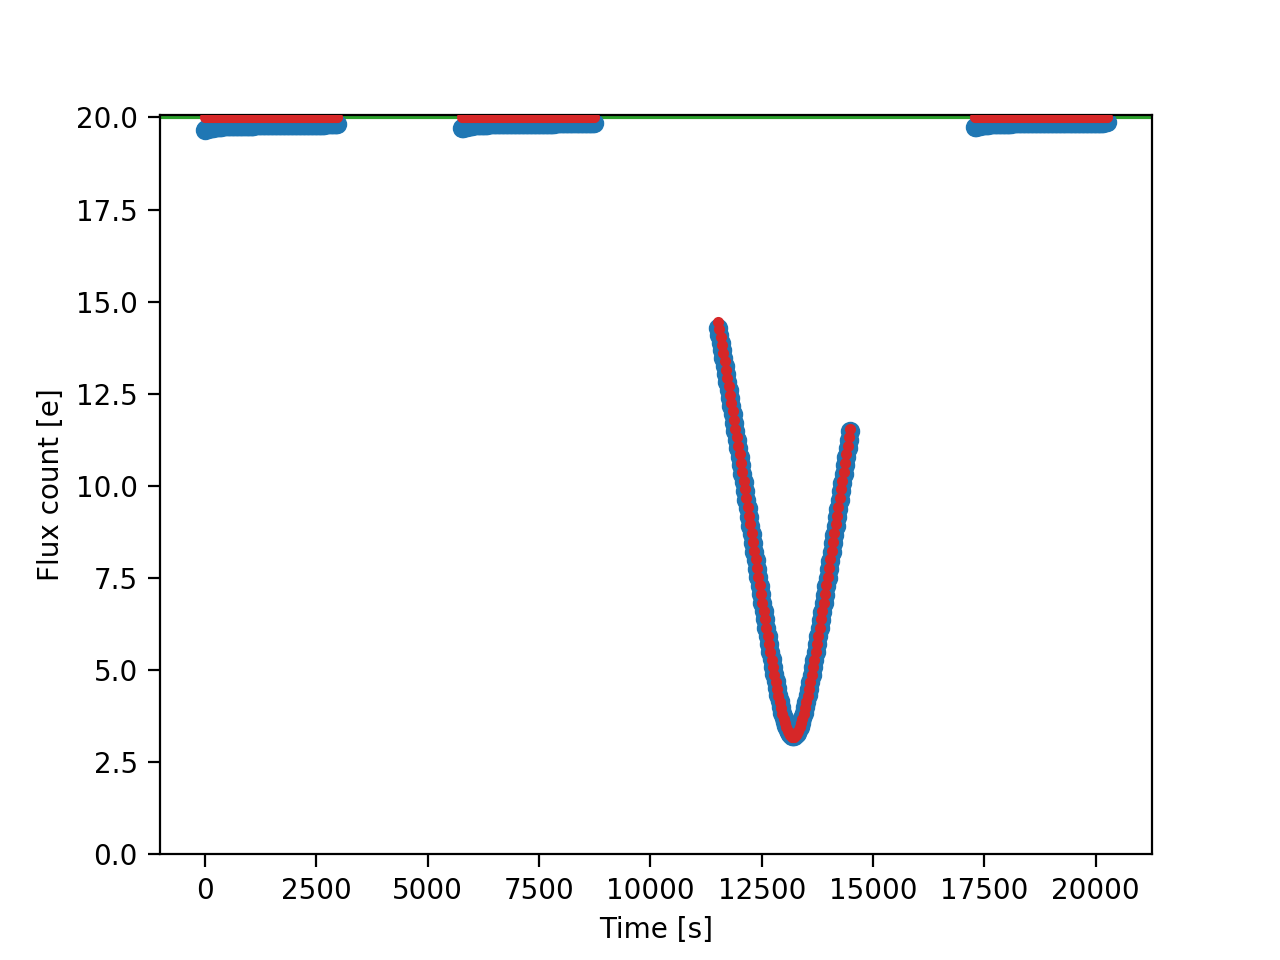

interactive(children=(FloatText(value=1500.0, description='slow N', step=100.0), FloatText(value=0.012, descri…

In [15]:
def rampModelPlot(
    nTrap_s,
    eta_s,
    tau_s,
    nTrap_f,
    eta_f,
    tau_f,
    crate=2,  # electron per second
    exptime=10):
    """plot the ramp model profiles with various model parameters
    
    nTrap: number of traps for slow (_s) and fast (_fast) traps
    eta: trapping efficiencies
    tau: trap lifetimes
    """    
    # rampModel function is made to conveniently change the charge trapping 
    # related parameters
    # This function is not for correction purposes
    lc, lc0, t = rampModel(
        nTrap_s,
        eta_s,
        tau_s,
        nTrap_f,
        eta_f,
        tau_f,
        crate,
        exptime,
        mode='staring'
    )
    fig = plt.gcf()
    plt.cla()
    plt.axhline(crate * exptime, color='C2')
    plt.plot(t, lc0, '.', color='C3', zorder=10)
    plt.plot(t, lc, 'o')
    plt.xlabel('Time [s]')
    plt.ylabel('Flux count [e]')
    plt.ylim(0, crate*exptime*1.003)
    plt.draw()
    
# create interactive widgets
trap_s = widgets.FloatText(min=1000, max=3000, value=1500, step=100, 
                           description='slow N')
trap_f = widgets.FloatText(min=50, max=500, value=300, step=50, 
                           description='fast N')
eta_s = widgets.FloatText(min=0.005, max=0.02, value=0.012, step=0.001, 
                           description='slow eta')
eta_f = widgets.FloatText(min=0.001, max=0.01, value=0.005, step=0.001, 
                           description='fast eta')
tau_s = widgets.FloatText(min=6000, max=30000, value=15000, step=2000, 
                           description='slow tau')
tau_f = widgets.FloatText(min=50, max=500, value=200, step=50, 
                           description='fast tau')

plt.figure()

# make interactive plot
interactive_plot = interactive(rampModelPlot,
                               nTrap_s=trap_s,
                               eta_s=eta_s,
                               tau_s=tau_s,
                               nTrap_f=trap_f,
                               eta_f=eta_f,
                               tau_f=tau_f,
                               continuous_update=False)

# adjust details of the plot
output = interactive_plot.children[-1]
output.layout.height = '350px'
# run the interactive plot
interactive_plot

## Ramp Correction Demonstrations
The six parameters described above stays rather constant among different observations. What determines the ramp profiles are the initial states of the charge trap status. Additionally trapped charges during the earth occulation also affects the ramp profiles. The initial stats and additional trapped charges are controlled by parameters `trap_pop_s`, `trap_pop_f`, `dTrap_s`, and `dTrap_f`. When correcting ramp effect in the observed light curves, these parameters need to be fit so that the model can match the observed light curves.

These parameters can be adjusted in the following intercative plot. This demontration shows how the model profile changes with the parameters that are fit during ramp effect corrections.

<IPython.core.display.Javascript object>


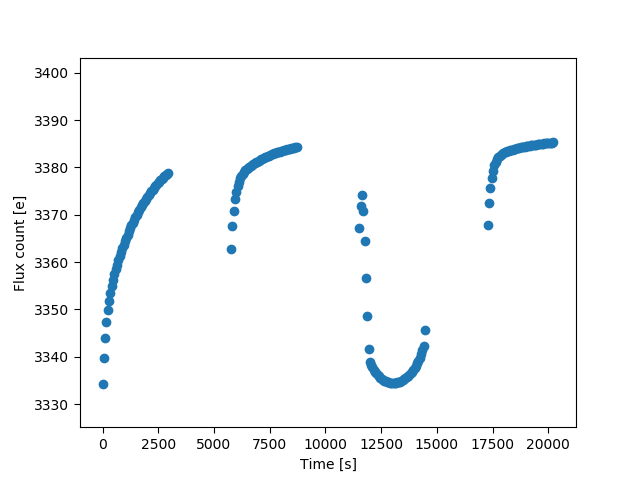

interactive(children=(FloatSlider(value=50.0, description='slow initial', max=500.0, step=50.0), FloatSlider(v…

In [3]:
def rampCorrectionPlot(
    trap_pop_s,
    trap_pop_f,
    dTrap_s,
    dTrap_f,
    crate=200,  
    exptime=100): 
    """plot the ramp model profiles with parameters that are used 
        in ramp effect corrections
    
    trap_pop: initial states of the charge traps
    dTrap: added charges during earth occulation
    """
    lc, t = rampCorrection(
        crate,
        exptime,
        trap_pop_s,
        trap_pop_f,
        dTrap_s,
        dTrap_f,
    )
    fig = plt.gcf()
    plt.cla()
    plt.plot(t, lc, 'o')
    plt.xlabel('Time [s]')
    plt.ylabel('Flux count [e]')
    plt.ylim(crate*exptime * 0.98, crate*exptime*1.003)
    plt.draw()
    
trap_pop_s = widgets.FloatSlider(min=0, max=500, value=50, step=50, 
                           description='slow initial')
trap_pop_f = widgets.FloatSlider(min=0, max=100, value=10, step=10, 
                           description='fast initial')
dTrap_s = widgets.FloatSlider(min=0, max=500, value=0, step=50, 
                           description='slow extra')
dTrap_f = widgets.FloatSlider(min=0, max=100, value=0, step=10, 
                           description='fast extra')

plt.figure()
interactive_plot = interactive(rampCorrectionPlot,
                               trap_pop_s=trap_pop_s,
                               trap_pop_f=trap_pop_f,
                               dTrap_s=dTrap_s,
                               dTrap_f=dTrap_f,
                               continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot